# Chapter 7

## Question 7

Further exploration of the `Wage` dataset, using other features, and other non-linear fitting methods.

Those other methods:
- Polynomial regression
- Step functions
- Regression splines
- Smoothing splines
- Local regression
- GAMs (the general framework for the above)

In [57]:
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.linear_model


sns.set(style="whitegrid")

In [58]:
wage_data = sm.datasets.get_rdataset("Wage", "ISLR").data
wage_data.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [59]:
wage_data.wage.describe()

count    3000.000000
mean      111.703608
std        41.728595
min        20.085537
25%        85.383940
50%       104.921507
75%       128.680488
max       318.342430
Name: wage, dtype: float64

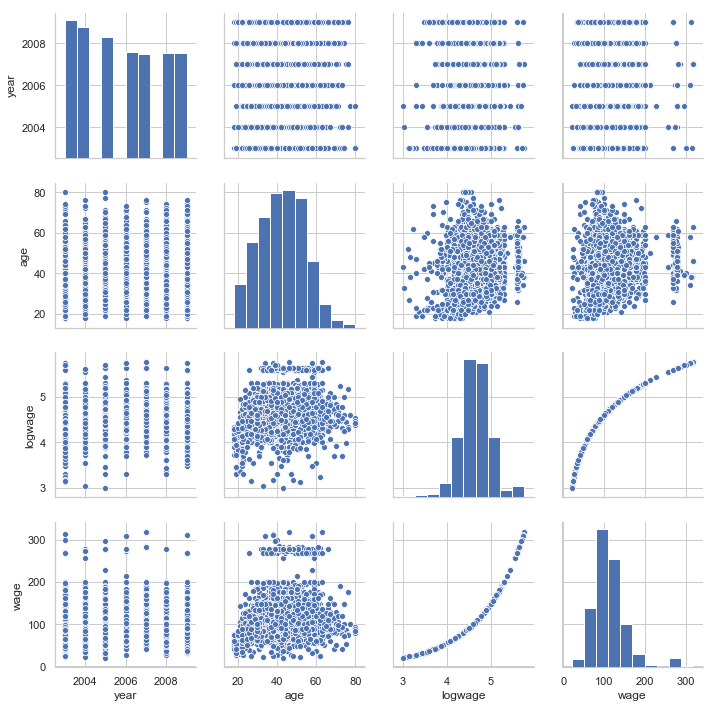

In [60]:
sns.pairplot(wage_data)

We have lots of categorical variables here. How many groups does each have?

In [61]:
for col in ["maritl", "race", "education", "region", "jobclass", "health", "health_ins"]:
    print(col)
    print(wage_data[col].value_counts())
    print()

maritl
2. Married          2074
1. Never Married     648
4. Divorced          204
5. Separated          55
3. Widowed            19
Name: maritl, dtype: int64

race
1. White    2480
2. Black     293
3. Asian     190
4. Other      37
Name: race, dtype: int64

education
2. HS Grad            971
4. College Grad       685
3. Some College       650
5. Advanced Degree    426
1. < HS Grad          268
Name: education, dtype: int64

region
2. Middle Atlantic    3000
Name: region, dtype: int64

jobclass
1. Industrial     1544
2. Information    1456
Name: jobclass, dtype: int64

health
2. >=Very Good    2142
1. <=Good          858
Name: health, dtype: int64

health_ins
1. Yes    2083
2. No      917
Name: health_ins, dtype: int64



All these can reasonably be one-hot encoded (i.e. dummy variables created), except "region" which tells us nothing at all

In [62]:
wage_data = wage_data.drop(columns=["region"])
for col in ["maritl", "race", "education", "jobclass", "health", "health_ins"]:
    dummies = pd.get_dummies(wage_data[col], prefix=col, drop_first=True)
    wage_data = pd.concat([wage_data, dummies], axis=1).drop(columns=[col])

In [63]:
wage_data.head()

,year,age,logwage,wage,maritl_2. Married,maritl_3. Widowed,maritl_4. Divorced,maritl_5. Separated,race_2. Black,race_3. Asian,race_4. Other,education_2. HS Grad,education_3. Some College,education_4. College Grad,education_5. Advanced Degree,jobclass_2. Information,health_2. >=Very Good,health_ins_2. No
231655,2006,18,4.318063,75.043154,0,0,0,0,0,0,0,0,0,0,0,0,0,1
86582,2004,24,4.255273,70.476020,0,0,0,0,0,0,0,0,0,1,0,1,1,1
161300,2003,45,4.875061,130.982177,1,0,0,0,0,0,0,0,1,0,0,0,0,0
155159,2003,43,5.041393,154.685293,1,0,0,0,0,1,0,0,0,1,0,1,1,0
11443,2005,50,4.318063,75.043154,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [64]:
X = wage_data.drop(columns=["logwage", "wage"])
y = wage_data.wage

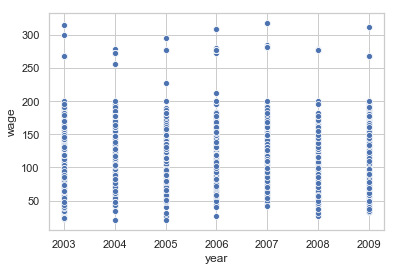

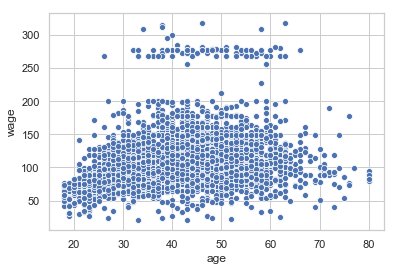

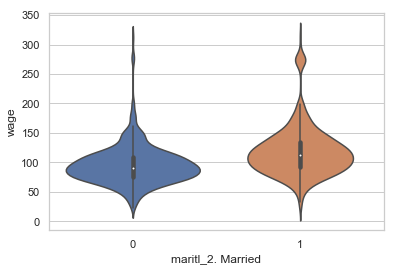

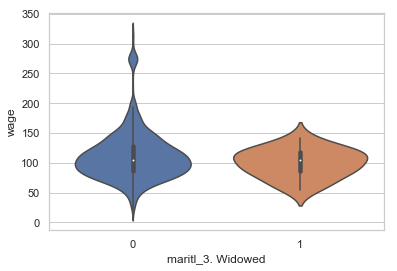

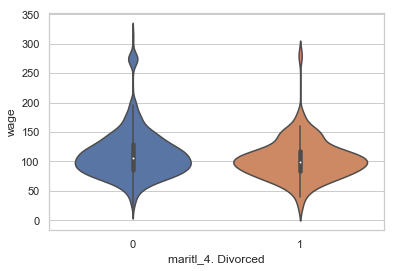

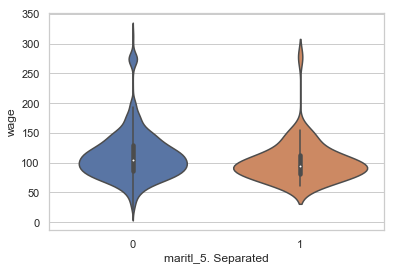

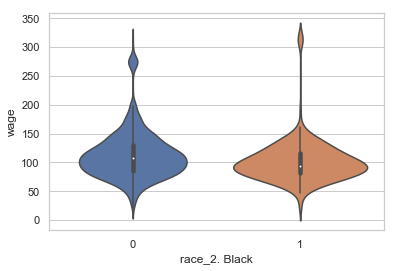

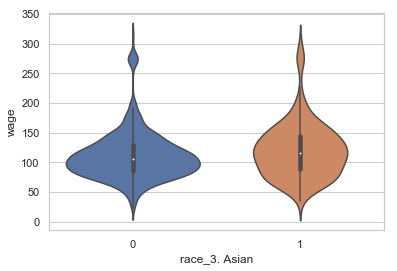

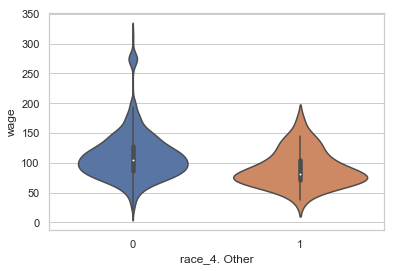

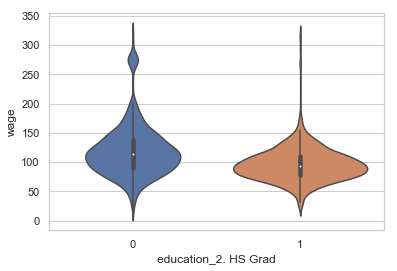

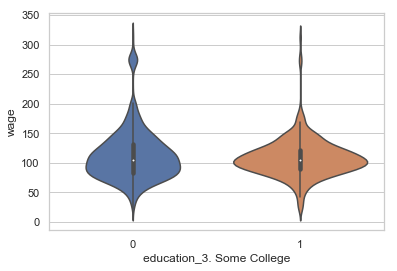

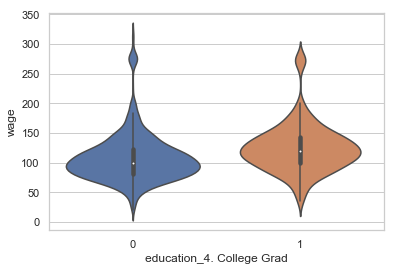

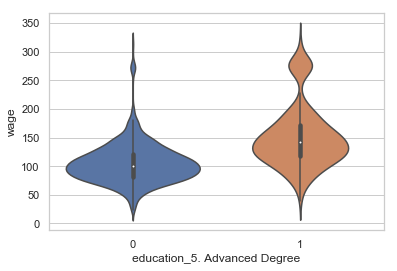

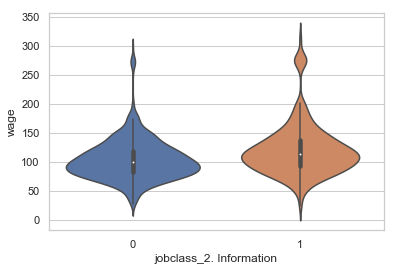

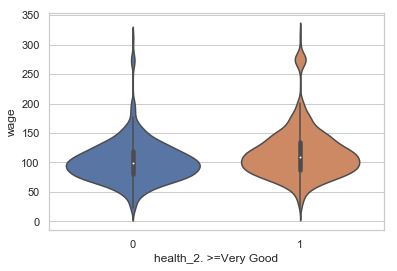

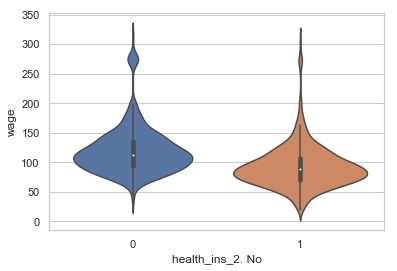

In [68]:
for col in X:    
    if len(X[col].unique()) != 2:
        sns.scatterplot(x=col, y="wage", data=wage_data)
    else:
        sns.violinplot(x=col, y="wage", data=wage_data,orient="v")
    plt.show()

In [69]:
# Route one - a basic OLS regressor with all features
model = sklearn.linear_model.LinearRegression()
scores = sklearn.model_selection.cross_val_score(model, X,y, scoring="neg_mean_squared_error", cv=5)
score = -np.mean(scores)
print(score)

1159.6469174760837


- Polynomial regression
- Step functions
- Regression splines
- Smoothing splines
- Local regression
- GAMs (the general framework for the above)
